##Project 4: Web Scraping Job Postings
Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

Determine the industry factors that are most important in predicting the salary amounts for these data.
Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?
To limit the scope, your principal has suggested that you focus on data-related job postings, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by limiting your search to a single region.

Hint: Aggregators like Indeed.com regularly pool job postings from a variety of markets and industries.

Goal: Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

Directions
In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

##QUESTION 1: Factors that impact salary
To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:

##NLP
Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
Ensemble methods and decision tree models
SVM models
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

##Requirements
Scrape and prepare your own data.

Create and compare at least two models for each section. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Section 1: Job Salary Trends
Section 2: Job Category Factors
Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists.

Make sure to clearly describe and label each section.
Comment on your code so that others could, in theory, replicate your work.
A brief writeup in an executive summary, written for a non-technical audience.

Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.
BONUS
Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [121]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [122]:
#Opening and Combining the 3 different csv
#I have no idea why 'latin-1' is used but it seems to be the only encoding that can be used
careers1 = pd.read_csv("./Archive/data_MCF_minmax_1-20.csv",encoding='latin-1')
careers2 = pd.read_csv("./Archive/data_MCF_minmax_23-40.csv",encoding='latin-1')
careers3 = pd.read_csv("./Archive/data_MCF_minmax_40-60.csv",encoding='latin-1')

In [123]:
print careers1.head()
print careers2.head()
print careers3.head()

   Unnamed: 0                                 Company  \
0           0           GOOGLE ASIA PACIFIC PTE. LTD.   
1           1                          BLOOMBERG L.P.   
2           2                A*STAR RESEARCH ENTITIES   
3           3  CARAT MEDIA SERVICES SINGAPORE PTE LTD   
4           4                                  UBS AG   

                                            JobTitle Location EmploymentType  \
0  Data Center Strategic Negotiator, Site Acquisi...    South      Full Time   
1           Data Contribution Support Representative    South      Full Time   
2                                SICS - Data Manager  Central      Full Time   
3                                      Data Engineer  Central      Full Time   
4                       CMO Maintenance Data Analyst    South   Contract ...   

          Seniority                     Category  \
0         Executive           General Management   
1         Executive           General Management   
2  Junior Executive 

In [124]:
careers=careers1.append(careers2)
careers=careers.append(careers3)
careers

,Unnamed: 0,Company,JobTitle,Location,EmploymentType,Seniority,Category,GovSupport,Minsalary,Maxsalary,Monthly,JobLink,PostedDate,ClosingDate,RoleResponsibility,Requirements
0,0,GOOGLE ASIA PACIFIC PTE. LTD.,"Data Center Strategic Negotiator, Site Acquisi...",South,Full Time,Executive,General Management,Government support available,"$10,500","$17,500",Monthly,/job/c7be1cb4a491ee3740a7f44fa5e2f03c,19-Apr-18,19-May-18,Company overview: Google is not a conventional...,Minimum qualifications: Bachelor's degree in ...
1,1,BLOOMBERG L.P.,Data Contribution Support Representative,South,Full Time,Executive,General Management,Government support available,"$5,000","$6,250",Monthly,/job/8c04f46eebe78966a20d0f6b66874036,19-Apr-18,19-May-18,You are excited by the prospect of operating o...,You'll need to have - Excellent communication ...
2,2,A*STAR RESEARCH ENTITIES,SICS - Data Manager,Central,Full Time,Junior Executive,Banking and Finance,Government support available,"$2,500","$5,000",Monthly,/job/56cd672437e47eec4b2f269fc7bb4e56,17-Apr-18,17-May-18,About Singapore Institute for Clinical Science...,Degree in Bioinformatics or relevant field 5-...
3,3,CARAT MEDIA SERVICES SINGAPORE PTE LTD,Data Engineer,Central,Full Time,Junior Executive,Banking and Finance,Government support available,"$3,500","$6,000",Monthly,/job/fadf2ca5185e0bb439ca1ffae5f526e7,12-Apr-18,12-May-18,Summary: iProspect helps our clients achieve t...,Skills & Experience Required: The role will be...
4,4,UBS AG,CMO Maintenance Data Analyst,South,Contract ...,Non-executive,Sciences / Laboratory / R&D,NaN,"$2,917","$4,833",Monthly,/job/531f8e41ed9984b7595b176d7edab410,11-Apr-18,11-May-18,Your role : Are you incredibly organized with ...,YourÎ¾experience and skills :¢ Past experien...
5,5,MONEYSMART SINGAPORE PTE. LTD.,Data Analyst,South,Contract ...,Non-executive,Sciences / Laboratory / R&D,Government support available,"$5,000","$7,000",Monthly,/job/cc82172cc065c02d29c80888752c0382,10-Apr-18,10-May-18,The mission As part of becoming one of the fou...,"Requirements Degree in Computer Science, Math..."
6,6,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Technology Consulting - Data and Analytics Ass...,Central,Permanent ...,Executive ...,Advertising / Media,Government support available,"$3,500","$7,000",Monthly,/job/437f9eb6403f694a373fb21cba615107,6-Apr-18,6-May-18,Consulting We help organisations to work smar...,Requirements Below are the attributes and ski...
7,7,DENTSU AEGIS NETWORK HUB2050,Data Science Analyst,Central,Permanent ...,Executive ...,Advertising / Media,Government support available,"$4,000","$6,000",Monthly,/job/3ab8e8e1373a15a42f60f0dac7496fff,6-Apr-18,6-May-18,BACKGROUND: About Dentsu Aegis Network Dentsu ...,  We invite people passionate about data a...
8,8,COMTEL SOLUTIONS PTE LTD,Data Analyst / Business Data Analyst,Central,Full Time,Professional,Banking and Finance,Government support available,"$7,000","$10,500",Monthly,/job/2319ca82a811eb1f8e103c26015ba42a,4-Apr-18,4-May-18,Responsible to perform Data Profiling Respons...,Over all 5 to 8 years of experienceÎ¾ Analyst...
9,9,LAZADA SERVICES SOUTH EAST ASIA PTE. LTD.,Senior Data Engineer,Central,Full Time,Professional,Banking and Finance,Government support available,"$9,000","$11,000",Monthly,/job/9ad8e5ae860f5d974d91c54f4f333363,2-Apr-18,2-May-18,Introduction to Lazada eLogistics (LeL) Every...,"To succeed in the role, you should ideally hav..."


In [125]:
#Taking a look at the data of a row
careers.iloc[45]

Unnamed: 0                                                           46
Company                                     NERA TELECOMMUNICATIONS LTD
JobTitle              Regional Product Manager - Data Security & Ser...
Location                                                        Central
EmploymentType                                                Permanent
Seniority                                             Senior Management
Category                                       Advertising / Media  ...
GovSupport                                 Government support available
Minsalary                                                       $5,000 
Maxsalary                                                       $6,000 
Monthly                                                         Monthly
JobLink                           /job/88b32d75539eadeece60af18fcf2da76
PostedDate                                                    29-Mar-18
ClosingDate                                                   28

In [126]:
careers.RoleResponsibility.dtype

dtype('O')

In [127]:
#type(careers['ClosingDate'])

In [128]:
careers.head()

,Unnamed: 0,Company,JobTitle,Location,EmploymentType,Seniority,Category,GovSupport,Minsalary,Maxsalary,Monthly,JobLink,PostedDate,ClosingDate,RoleResponsibility,Requirements
0,0,GOOGLE ASIA PACIFIC PTE. LTD.,"Data Center Strategic Negotiator, Site Acquisi...",South,Full Time,Executive,General Management,Government support available,"$10,500","$17,500",Monthly,/job/c7be1cb4a491ee3740a7f44fa5e2f03c,19-Apr-18,19-May-18,Company overview: Google is not a conventional...,Minimum qualifications: Bachelor's degree in ...
1,1,BLOOMBERG L.P.,Data Contribution Support Representative,South,Full Time,Executive,General Management,Government support available,"$5,000","$6,250",Monthly,/job/8c04f46eebe78966a20d0f6b66874036,19-Apr-18,19-May-18,You are excited by the prospect of operating o...,You'll need to have - Excellent communication ...
2,2,A*STAR RESEARCH ENTITIES,SICS - Data Manager,Central,Full Time,Junior Executive,Banking and Finance,Government support available,"$2,500","$5,000",Monthly,/job/56cd672437e47eec4b2f269fc7bb4e56,17-Apr-18,17-May-18,About Singapore Institute for Clinical Science...,Degree in Bioinformatics or relevant field 5-...
3,3,CARAT MEDIA SERVICES SINGAPORE PTE LTD,Data Engineer,Central,Full Time,Junior Executive,Banking and Finance,Government support available,"$3,500","$6,000",Monthly,/job/fadf2ca5185e0bb439ca1ffae5f526e7,12-Apr-18,12-May-18,Summary: iProspect helps our clients achieve t...,Skills & Experience Required: The role will be...
4,4,UBS AG,CMO Maintenance Data Analyst,South,Contract ...,Non-executive,Sciences / Laboratory / R&D,NaN,"$2,917","$4,833",Monthly,/job/531f8e41ed9984b7595b176d7edab410,11-Apr-18,11-May-18,Your role : Are you incredibly organized with ...,YourÎ¾experience and skills :¢ Past experien...


In [129]:
len(careers)

1002

In [130]:
careers.describe(include="all")

,Unnamed: 0,Company,JobTitle,Location,EmploymentType,Seniority,Category,GovSupport,Minsalary,Maxsalary,Monthly,JobLink,PostedDate,ClosingDate,RoleResponsibility,Requirements
count,1002.000000,1002,1002,1002,1002,1002,1002,560,896,896,898,1002,1002,1002,1002,1002
unique,NaN,507,830,11,9,15,47,3,107,123,1,1002,37,39,937,906
top,NaN,A*STAR RESEARCH ENTITIES,Data Scientist,Central,Full Time,Professional,Information Technology,Government support available,"$6,000","$5,000",Monthly,/job/0db13ec26c7bcee01f6dea50969b2c89,17-Apr-18,17-May-18,The Manager/Senior Manager uses data analytics...,-
freq,NaN,53,20,420,330,230,291,557,88,73,898,1,91,85,15,35
mean,174.534930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,106.498917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,169.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,255.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
#Dropping the columns which will not be used for running the models
careers.drop(labels=['Unnamed: 0','Location','EmploymentType','GovSupport','JobLink','PostedDate','ClosingDate','Monthly'], axis=1,inplace=True)

In [132]:
#careers.head(2)

In [133]:
#careers.describe()

In [134]:
#Removing all spaces and lowercase the column names
careers.columns = [x.lower().replace(' ','') for x in careers.columns]

In [135]:
careers.head()

,company,jobtitle,seniority,category,minsalary,maxsalary,roleresponsibility,requirements
0,GOOGLE ASIA PACIFIC PTE. LTD.,"Data Center Strategic Negotiator, Site Acquisi...",Executive,General Management,"$10,500","$17,500",Company overview: Google is not a conventional...,Minimum qualifications: Bachelor's degree in ...
1,BLOOMBERG L.P.,Data Contribution Support Representative,Executive,General Management,"$5,000","$6,250",You are excited by the prospect of operating o...,You'll need to have - Excellent communication ...
2,A*STAR RESEARCH ENTITIES,SICS - Data Manager,Junior Executive,Banking and Finance,"$2,500","$5,000",About Singapore Institute for Clinical Science...,Degree in Bioinformatics or relevant field 5-...
3,CARAT MEDIA SERVICES SINGAPORE PTE LTD,Data Engineer,Junior Executive,Banking and Finance,"$3,500","$6,000",Summary: iProspect helps our clients achieve t...,Skills & Experience Required: The role will be...
4,UBS AG,CMO Maintenance Data Analyst,Non-executive,Sciences / Laboratory / R&D,"$2,917","$4,833",Your role : Are you incredibly organized with ...,YourÎ¾experience and skills :¢ Past experien...


In [136]:
#Checking for number of rows (in each column) for null values
careers.isnull().sum()

company                 0
jobtitle                0
seniority               0
category                0
minsalary             106
maxsalary             106
roleresponsibility      0
requirements            0
dtype: int64

In [137]:
minsalary=careers['minsalary']
#minsalary

In [138]:
minsalary.dtype

dtype('O')

In [139]:
#Removing $ sign from Min Salary and changing it to a float
careers['minsalary']=(careers['minsalary'].replace( '[\$,)]','', regex=True ).astype(float))

In [140]:
#careers['minsalary'].head(2)

In [141]:
#Removing $ sign from Min Salary and changing it to a float
careers['maxsalary']=(careers['maxsalary'].replace( '[\$,)]','', regex=True ).astype(float))

In [142]:
#careers["maxsalary"].head(2)

In [143]:
#Create a column for Mean salary, rounded down to near hundred SGD, in integer
careers['meansalary']=((((careers["minsalary"]+careers["maxsalary"])/2).fillna(0.0))/ 100).astype(int) *100

In [144]:
#careers['meansalary'].head()

In [145]:
#careers['meansalary'].count()

In [146]:
#Output as csv to check
#careers.to_csv('/Users/delphiboy/Desktop/careers_preview20180424.csv',encoding='latin-1')

In [147]:
careers.columns.values

array([u'company', u'jobtitle', u'seniority', u'category', u'minsalary',
       u'maxsalary', u'roleresponsibility', u'requirements', 'meansalary'],
      dtype=object)

In [148]:
careers

,company,jobtitle,seniority,category,minsalary,maxsalary,roleresponsibility,requirements,meansalary
0,GOOGLE ASIA PACIFIC PTE. LTD.,"Data Center Strategic Negotiator, Site Acquisi...",Executive,General Management,10500.0,17500.0,Company overview: Google is not a conventional...,Minimum qualifications: Bachelor's degree in ...,14000
1,BLOOMBERG L.P.,Data Contribution Support Representative,Executive,General Management,5000.0,6250.0,You are excited by the prospect of operating o...,You'll need to have - Excellent communication ...,5600
2,A*STAR RESEARCH ENTITIES,SICS - Data Manager,Junior Executive,Banking and Finance,2500.0,5000.0,About Singapore Institute for Clinical Science...,Degree in Bioinformatics or relevant field 5-...,3700
3,CARAT MEDIA SERVICES SINGAPORE PTE LTD,Data Engineer,Junior Executive,Banking and Finance,3500.0,6000.0,Summary: iProspect helps our clients achieve t...,Skills & Experience Required: The role will be...,4700
4,UBS AG,CMO Maintenance Data Analyst,Non-executive,Sciences / Laboratory / R&D,2917.0,4833.0,Your role : Are you incredibly organized with ...,YourÎ¾experience and skills :¢ Past experien...,3800
5,MONEYSMART SINGAPORE PTE. LTD.,Data Analyst,Non-executive,Sciences / Laboratory / R&D,5000.0,7000.0,The mission As part of becoming one of the fou...,"Requirements Degree in Computer Science, Math...",6000
6,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Technology Consulting - Data and Analytics Ass...,Executive ...,Advertising / Media,3500.0,7000.0,Consulting We help organisations to work smar...,Requirements Below are the attributes and ski...,5200
7,DENTSU AEGIS NETWORK HUB2050,Data Science Analyst,Executive ...,Advertising / Media,4000.0,6000.0,BACKGROUND: About Dentsu Aegis Network Dentsu ...,  We invite people passionate about data a...,5000
8,COMTEL SOLUTIONS PTE LTD,Data Analyst / Business Data Analyst,Professional,Banking and Finance,7000.0,10500.0,Responsible to perform Data Profiling Respons...,Over all 5 to 8 years of experienceÎ¾ Analyst...,8700
9,LAZADA SERVICES SOUTH EAST ASIA PTE. LTD.,Senior Data Engineer,Professional,Banking and Finance,9000.0,11000.0,Introduction to Lazada eLogistics (LeL) Every...,"To succeed in the role, you should ideally hav...",10000


In [149]:
careers.shape

(1002, 9)

In [150]:
careers.describe()

,minsalary,maxsalary,meansalary
count,896.000000,896.000000,1002.000000
mean,5126.466518,8045.983259,5872.255489
std,2644.299391,4820.845833,3955.507889
min,500.000000,1300.000000,0.000000
25%,3300.000000,5000.000000,3600.000000
50%,4500.000000,7000.000000,5500.000000
75%,6000.000000,10000.000000,7500.000000
max,21000.000000,60000.000000,32500.000000


In [151]:
#careers.groupby('meansalary')['company'].nunique()

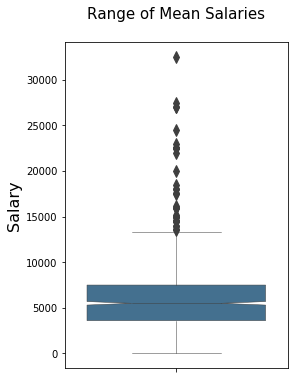

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check for super outlier
fig = plt.figure(figsize=(4,6))
ax = fig.gca()

ax = sns.boxplot(careers.meansalary, orient='v',
                fliersize=8, linewidth=.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('Salary', fontsize=16)
ax.set_title('Range of Mean Salaries\n', fontsize=15)

plt.show()

In [153]:
careers[(careers['meansalary']>25000)]

,company,jobtitle,seniority,category,minsalary,maxsalary,roleresponsibility,requirements,meansalary
244,DBS BANK LTD.,"MD / ED, Head of CB Ops Tech, Grp Consumer B...",Executive,Banking and Finance,18000.0,36000.0,Partner with the head of business Operations ...,Degree in Computer Science or equivalent At l...,27000
245,DBS BANK LTD.,"ED, Platform Tranformation, Data & Transformat...",Executive,Banking and Finance,18000.0,36000.0,Rollout the new concepts across the platforms...,More than 10 years of experience in strategy ...,27000
214,MOLEAC PTE. LTD.,"VP, Medical Affairs",Senior Management ...,Marketing / Public Relations,15000.0,40000.0,A. Company Overview Moleac (www.moleac.com) is...,Relevent Experience: Medical Doctor form repu...,27500
54,NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...,Senior Consultant (TANDEM / HP-NonStop Platf...,Manager,Engineering ...,5000.0,60000.0,Overall Function The incumbent will primarily ...,Minimum Diploma/Degree in IT/Computer Science...,32500


In [154]:
careers[(careers['meansalary']<2000)&(careers['meansalary']!=0)]

,company,jobtitle,seniority,category,minsalary,maxsalary,roleresponsibility,requirements,meansalary
184,XCELLINK PTE. LTD.,Data Centre Operations Support Specialist,Executive,Information Technology,1600.0,2200.0,Roles & Responsibilities: Handle mission crit...,Job Requirement: Fresh graduates with no prio...,1900
265,LUMILEDS SINGAPORE PTE. LTD.,Data Admin (Manufacturing Engineering System),Senior Executive,Customer Service,1200.0,1500.0,¢ Perform CAMSTAR modeling and configuration...,#NAME?,1300
109,BIMAGE CONSULTING PTE. LTD.,Engineering Assistant,Fresh/entry level,Advertising / Media ...,1500.0,2000.0,Carry out on-site data collection Î¾works usi...,ITE/ Polytechnics Diploma Holders in any Engi...,1700
117,HR-PRO RECRUITMENT SERVICES PTE. LTD.,Product Resarch Assistant,Fresh/entry level,Information Technology,1800.0,2100.0,Collates data from market research/surveys an...,Diploma in Biomedical/ Food ScienceÎ¾or relat...,1900
157,RMA CONTRACTS PTE. LTD.,Discipline Aide (School / Contract / East),Senior Executive,Information Technology,1700.0,1800.0,Discipline Aide (School/Contract/East) Minimum...,Requirements: Preferably at least a GCE 'O' L...,1700
53,PAN-ASIA RESOURCES PTE LTD,Desktop Support Engineer,Non-executive,Admin / Secretarial ...,1200.0,2400.0,æDiagnosing and solving hardware / software f...,"Desktop Support, IT Helpdesk Only shortlisted ...",1800
157,NEWMEDIA EXPRESS PTE. LTD.,Internet Technician,Executive,Marketing / Public Relations ...,1500.0,2000.0,äóäóäóäóäóäóMonitor and report on power...,Minimum Qualifications and Requirement: 1. ITE...,1700
174,SNAPCOIN PTE. LTD.,Administrative Executive,Professional,Information Technology,1800.0,2000.0,To provide administrative supports to our com...,"Specialisation Fields: Accounting, Administrat...",1900
186,KEYWORDS INTERNATIONAL PTE. LTD.,Localization Project Coordinator,Professional,Healthcare / Pharmaceutical ...,1200.0,1300.0,*PLEASE NOTE BEFORE APPLYING* This is a freela...,Excellent written and verbal communication sk...,1200
187,ARDENT CONSULTANCY,Logistic Coordinatoor,Professional,Sciences / Laboratory / R&D,1800.0,2000.0,Job Responsibilities Coordinate with third pa...,Requirements O Level/ITE/Diploma in Supply Ch...,1900


In [155]:
#careers.shape

In [156]:
#careers.groupby('meansalary')['company'].nunique()

In [157]:
#careers['meansalary'].describe()
#893 rows with salary information
#109 rows without salary information

In [158]:
careers.columns.values

array([u'company', u'jobtitle', u'seniority', u'category', u'minsalary',
       u'maxsalary', u'roleresponsibility', u'requirements', 'meansalary'],
      dtype=object)

In [159]:
#Concatenate roles column and requirement column together in a single column so further text analysis
careers['role_requirement']=careers['roleresponsibility']+careers['requirements']
#careers.head()

In [160]:
careers['role_requirement'] = careers['role_requirement'].dropna()

In [161]:
#len(careers['role_requirement'])

In [162]:
#Categorise the various Data related Job Titles, as generalised term (for categorisation) in the column 'flag'
#Mainly to be used in question 2, put here for the purpose of generating the boxplot of comparison of categories
#because I am curious what are the ranges of salaries for different Data Job Title (ie, which are the ones that pay
#better. So, I'm using generic names for categories, eg. engineer, architect, manager, analyst, scientist,
#developer and others.)

def check_it(input_str):
    input_str=input_str.lower()
    if "engineer" in input_str:
        return "Engineer"
    elif "architect" in input_str:
        return "Architect"
    elif "manager" in input_str:
        return "Manager"
    elif "analyst" in input_str:
        return "Analyst"
    elif "scientist" in input_str:
        return "Scientist"
    elif "developer" in input_str:
        return "Developer"
    elif "consultant" in input_str:
        return "Consultant"
    return "Others"

In [163]:
careers.loc[:, 'flag'] = careers.jobtitle.apply(check_it)

In [164]:
#careers.head()

In [165]:
avg_salary = careers.groupby(['flag'])[['meansalary']].mean()
avg_salary

,meansalary
flag,
Analyst,5742.176871
Architect,9664.285714
Consultant,7876.744186
Developer,6270.000000
Engineer,5404.545455
Manager,6855.487805
Others,5131.621622
Scientist,6618.333333


#Top 5 Jobs with highest mean salary
Architect
Consultant
Manager
Scientist
Developer

In [166]:
#Subset a Dataframe containing only flag and Salaries
subset = careers[['flag','meansalary','minsalary','maxsalary']]
subset.head()

,flag,meansalary,minsalary,maxsalary
0,Others,14000,10500.0,17500.0
1,Others,5600,5000.0,6250.0
2,Manager,3700,2500.0,5000.0
3,Engineer,4700,3500.0,6000.0
4,Analyst,3800,2917.0,4833.0


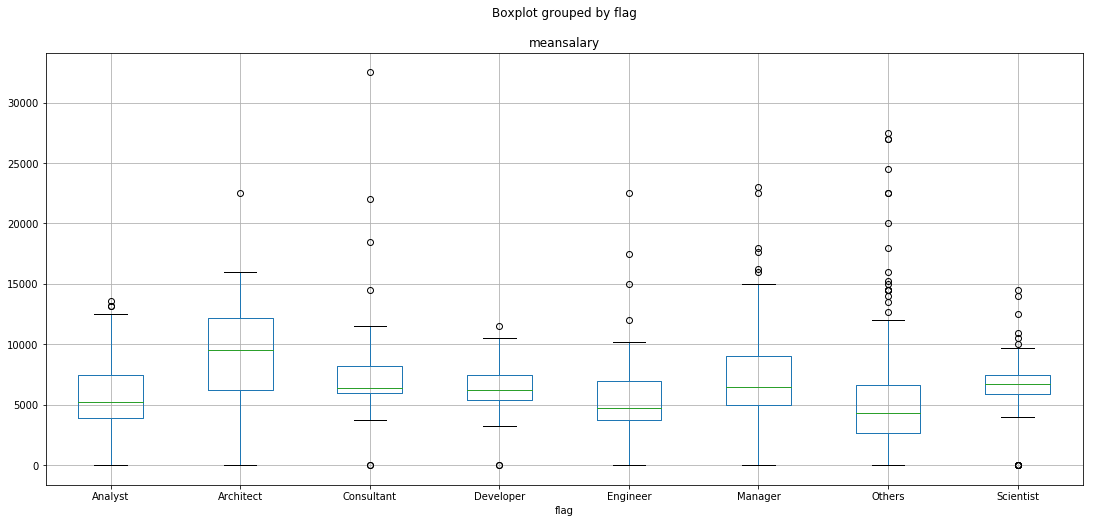

In [167]:
#Boxplot of Mean Salary according to flags
fig, ax = plt.subplots(figsize=(18,8))
plt.suptitle('')
careers.boxplot(column=['meansalary'], by='flag', ax=ax)

#This is not a good depiction of range of mean salaries for each categories because the null values are replaced as 0, causing the mean of the salaries to be lowered, as well as affecting the interquartile range and hence, the outliers. Also, as seen in the chart, the lowest salary of $0 is definitely not accurate because it does not mean these positions are "not paying" (ie, expecting people to work for free).
Nevertheless, it gives me an feel which job titles are the better paying ones.

In [168]:
#Preview in csv
#careers.to_csv('/Users/delphiboy/Desktop/careers_preview.csv',encoding='latin-1')

In [169]:
#Preview of the concatenated column of writeups
careers['role_requirement'].head()

0    Company overview: Google is not a conventional...
1    You are excited by the prospect of operating o...
2    About Singapore Institute for Clinical Science...
3    Summary: iProspect helps our clients achieve t...
4    Your role : Are you incredibly organized with ...
Name: role_requirement, dtype: object

# Since we have 893 rows with salary information and 109 rows without salary information, I intend to use 625 rows (70% of 893) with salary for train and the rest for test.

In [170]:
withsalary = careers[careers['meansalary']>0]
training_size = int(withsalary.shape[0] * .7)

In [171]:
#Randomly sampling 70% of rows (should be around 627 rows) with salary information
salary_train=withsalary.sample(n=training_size,replace=True)

In [172]:
# Capture the rest of the rows with salary information that's not "training" using an inverse mask (rows NOT IN training dataframe)
mask = withsalary.index.isin(salary_train.index)
salary_test = withsalary[~mask]

In [173]:
salary_train.shape[0], salary_test.shape[0]

(627, 176)

In [174]:
#Make sure that this data is integer type to be used for prediction
salary_test[('meansalary')].dtype

dtype('int64')

In [175]:
#define X and y
X_train=salary_train.role_requirement
y_train=salary_train[('meansalary')]

X_test=salary_test.role_requirement
y_test=salary_test[('meansalary')]
y_test_allsalary=salary_test[['minsalary','maxsalary','meansalary']]

In [176]:
y_train.dtype

dtype('int64')

In [177]:
#CountVectorizer to count words
cvt =  CountVectorizer(strip_accents='unicode',min_df=51)
X_train_dtm =  cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)
columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)

# note this is a large sparse matrix. 
#    - rows are tweets, columns are words 
#X_all = X_train_dtm
X_train_dtm

<627x513 sparse matrix of type '<type 'numpy.int64'>'
	with 64771 stored elements in Compressed Sparse Row format>

##Expanding the list of stopwords
Further downwards this notebook, words that are perceived not to be contributing to the accuracy are constantly added to the list of stopwords. However, because the data was encoded by 'latin 1' (which seems to be the only way to read the data), the gibberish words keep appearing and it seems there are no methods to remove them totally.

In [178]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ["http", "https", "rt",'www','åê','ae','pre','sg','ao','edu','youäó','i3','4i3','î¾','requirements','end end','years experience','within organisation','senior manager','candidates notified','bloomberg','barclay']

In [179]:
#checking out what are the words in the list
#stop

##Predict the Salary with the new features from CountVectorizer and Naive Bayes

In [180]:
# use default options for CountVectorizer
cvt = CountVectorizer()

# create document-term matrices
X_train_dtm = cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)

# use Naive Bayes to predict the Salary
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.10227272727272728


In [181]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(cvt):
    X_train_dtm = cvt.fit_transform(X_train)
    print 'Features: ', X_train_dtm.shape[1]
    X_test_dtm = cvt.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

##Predict the Salary with the new features from CountVectorizer and Naive Bayes (with n-grams)

In [182]:
# include 1-grams and 4-grams
cvt = CountVectorizer(ngram_range=(1, 4))
tokenize_test(cvt)

Features:  298822
Accuracy:  0.10227272727272728


##Predict the Salary with the new features from CountVectorizer and Naive Bayes (with 1-4grams, stop words)

In [183]:
# use default options for CountVectorizer
cvt = CountVectorizer(ngram_range=(1, 4),stop_words=stop)

# create document-term matrices
X_train_dtm = cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)

# use Naive Bayes to predict the Salary
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.10795454545454546


Result using CountVectorizer+Naive Bayes+ngrams is better than CountVectorizer+Naive Bayes.

##Using a Logistic Regression model

In [184]:
# use default options for CountVectorizer
cvt = CountVectorizer()

# create document-term matrices
X_train_dtm = cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

# using a 5-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=5)
print scores
print np.mean(scores)

[0.42774566 0.52205882 0.61538462 0.56074766 0.57446809]
0.5400809704623393


In [185]:
# using a 10-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=10)
print scores
print np.mean(scores)

/Users/delphiboy/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.43902439 0.5        0.51282051 0.5942029  0.66101695 0.64
 0.56521739 0.69230769 0.5        0.62857143]
0.5733161262951152


##Fit a Logistic Regression model (with n-grams)

In [186]:
# include 1-gram and 2-grams
cvt = CountVectorizer(ngram_range=(1, 2))

# create document-term matrices
X_train_dtm = cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

# using a 5-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=5)
print scores
print np.mean(scores)

[0.42196532 0.52941176 0.63247863 0.57009346 0.59574468]
0.5499387707797158


In [187]:
# using a 10-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=10)
print scores
print np.mean(scores)

[0.43089431 0.5        0.52564103 0.57971014 0.6779661  0.64
 0.56521739 0.71794872 0.5        0.65714286]
0.579452054760249


##Fit a Logistic Regression model (with 1-4grams and stop words)

In [188]:
# include 1-grams and 4-grams and stop words
cvt = CountVectorizer(ngram_range=(1, 4),stop_words=stop)

# create document-term matrices
X_train_dtm = cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

# using a 5-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=5)
print scores
print np.mean(scores)

[0.43352601 0.53676471 0.63247863 0.57943925 0.60638298]
0.5577183161963063


In [189]:
# using a 10-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=10)
print scores
print np.mean(scores)

[0.43902439 0.5        0.52564103 0.57971014 0.71186441 0.64
 0.58695652 0.71794872 0.60526316 0.65714286]
0.5963551222317569


In [190]:
y_test_allsalary=pd.DataFrame(y_test_allsalary) 
y_test_allsalary.reset_index(drop=True, inplace=True)
y_test_allsalary.head(2)

,minsalary,maxsalary,meansalary
0,5000.0,6250.0,5600
1,2917.0,4833.0,3800


In [191]:
y_pred_class=pd.DataFrame(y_pred_class) 
y_pred_class=y_pred_class['y_pred']
y_pred_class.head(2)

KeyError: 'y_pred'

In [192]:
#Putting y_test and y_pred_class together to see the difference, difference percentage with respect to meansalary 
y_df= pd.concat([y_test, y_pred_class], axis=1, join='inner') 
y_df['residual']=y_df['meansalary']-y_df['y_pred'] 
y_df["resid_percentage"]=((y_df['y_pred']/y_df['meansalary'])*100)-100 
y_df.head(2)

ValueError: Shape of passed values is (2, 204), indices imply (2, 80)

In [ ]:
#Average Percentage of all the Differences between Predicted and Actual Salary
y_df['resid_percentage'].mean()

##Fit a Logistic Regression model (with n-grams, stop words and set features to 1000)

In [194]:
# include 1-gram and 4-grams, stop words and 1000 features
cvt = CountVectorizer(ngram_range=(1, 4),stop_words=stop,max_features=1000)
#tokenize_test(cvt)

# create document-term matrices
X_train_dtm = cvt.fit_transform(X_train)
X_test_dtm = cvt.transform(X_test)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

# using a 5-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=5)
print scores
print np.mean(scores)

[0.41618497 0.52941176 0.61538462 0.56074766 0.58510638]
0.5413670795437778


In [195]:
# using a 10-fold cross-val
scores = cross_val_score(lr, X_train_dtm, y_train, cv=10)
print scores
print np.mean(scores)

[0.42276423 0.5        0.5        0.5942029  0.66101695 0.66
 0.58695652 0.66666667 0.55263158 0.65714286]
0.5801381699841566


Score using CountVectorizer+Logistic Regression+1-4grams+stopwords > CountVectorizer+Logistic Regression+ngrams > CountVectorizer+Logistic Regression. 

Using only Logistic Regression, cv=10 yields higher score than cv=5.

##Model with Decision Tree on the data

In [196]:
from sklearn.tree import DecisionTreeRegressor

In [197]:
# set 4 models
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtrN = DecisionTreeRegressor(max_depth=None)

In [198]:
# fit the 4 models
dtr1.fit(X_train_dtm, y_train)
dtr2.fit(X_train_dtm, y_train)
dtr3.fit(X_train_dtm, y_train)
dtrN.fit(X_train_dtm, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [199]:
# cross validate=5 for the 4 models
dtr1_scores = cross_val_score(dtr1, X_train_dtm, y_train, cv=5)
dtr2_scores = cross_val_score(dtr2, X_train_dtm, y_train, cv=5)
dtr3_scores = cross_val_score(dtr3, X_train_dtm, y_train, cv=5)
dtrN_scores = cross_val_score(dtrN, X_train_dtm, y_train, cv=5)

# score the 4 models
print np.mean(dtr1_scores)
print np.mean(dtr2_scores)
print np.mean(dtr3_scores)
print np.mean(dtrN_scores)

-0.03445712027524874
0.026658594100716353
0.051245126010692754
0.3647085916025222


##At max depth = None, the best score from using Decision Tree is 0.43, which is not as good as Logistic regression.
Therefore, Logistic regression seems to be the better model here. Having said so, I have not attempted using stemming and other techniques.


In [202]:
def get_freq_words(sparse_counts, columns):
    word_counts = np.asarray(X_train_dtm.sum(axis=0)).reshape(-1)

    largest_count_indices = word_counts.argsort()[::-1]

    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words


freq_words = get_freq_words(X_train_dtm, columns)
freq_words[:20]

IndexError: index 829 is out of bounds for axis 1 with size 513

##QUESTION 2: Factors that distinguish job category
Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:

What components of a job posting distinguish data scientists from other data jobs?
What features are important for distinguishing junior vs. senior positions?
Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?
You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

##The idea is such that there are word/words specific to the position (or industry or seniority) to describe the job or the skills required. Hence, the writeup would first be containing the job description and job requirements. We will then need to use ngrams (1-4) for a single word or combinations (of more than 1 word) to see which are most frequently used for the respective job titles/ industry/ seniority.

##By Job Title - Data Scientist vs the rest
What components of a job posting distinguish data scientists from other data jobs?

In [203]:
#Defining the variables (subsetting dataframes) according to the types within the flags so that tokenization can
#only take place within the subset

analyst=careers[careers['flag']=='Analyst']
architect=careers[careers['flag']=='Architect']
consultant=careers[careers['flag']=='Consultant']
developer=careers[careers['flag']=='Developer']
engineer=careers[careers['flag']=='Engineer']
manager=careers[careers['flag']=='Manager']
others=careers[careers['flag']=='Others']
scientist=careers[careers['flag']=='Scientist']

#all except data scientist
alltherest=careers[careers['flag']!='Scientist']

In [205]:
#Analyst
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(analyst['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(10)

(1000,)


258 trillion end march                    2909
871m volcker capture                      1803
185 transaction currencies world          1282
able identify                             1123
able shift                                1083
ability experience providing practical    1049
able write reports                        1041
academic bachelors                         930
ability drive client                       683
abnormalities perform data wrangling       659
dtype: int64

In [206]:
#Scientist
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(scientist['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(12)

(1000,)


abnormalities candidate write high     2909
action stop also take                  1803
ability conceptualise architect        1282
algorithms root cause diagnosis        1123
also handle manage small               1083
advanced large scale recommendation    1049
among travel behaviors                 1041
analyses data                           930
ads worldwide speed ease                683
amount data develop metrics             659
also engage aspects research            648
100x smaller little                     591
dtype: int64

In [207]:
#All the rest except for Data Scientist
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(alltherest['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(11)

(1000,)


10 years experience financial    2909
103 million clients              1803
0815am 0530pm                    1282
1t ram use                       1123
2007 practice grown rapidly      1083
12c6130 r1550032 belle bong      1049
2012 regional roll new           1041
2013 environment must             930
12 months position                683
2012 sharepoint                   659
2004 n3 performance based         648
dtype: int64

In [208]:
#Architect
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(architect['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(10)

(1000,)


adoption could career opportunity                2909
analytical troubleshooting debugging skillsî¾    1803
across functional                                1282
based end                                        1123
best practices likes                             1083
architects ensure                                1049
business administration                          1041
business correct                                  930
architect end end                                 683
business analyst functional                       659
dtype: int64

In [209]:
#Consultant
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(consultant['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(10)

(1000,)


ability identify                          2909
according security best practices         1803
3pl entities ability construct            1282
alternatively may apply                   1123
analysis design strong history            1083
activities implementing                   1049
analytical applications using qlikview    1041
analytics modelling coding using           930
active services like                       683
analytical skills                          659
dtype: int64

In [210]:
#Engineer
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(engineer['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(10)

(1000,)


2018 campus analyst             2909
3yeras working                  1803
1869 firm headquartered         1282
able work efficiently           1123
academy result                  1083
ability communication           1049
access import clean make        1041
access world supply              930
abilities data understanding     683
access management                659
dtype: int64

In [211]:
#Manager
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(manager['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(13)

(1000,)


280 different offices team         2909
77 000                             1803
150 000                            1282
able build relationships           1123
able lead plan execute             1083
ability develop strong internal    1049
able work independently            1041
abreast digital industry            930
ability communicate levels          683
able work independently within      659
able identify appropriate           648
000 33 000                          591
ability technology                  589
dtype: int64

In [212]:
#Developer
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(developer['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(10)

(1000,)


able read performance                          2909
actively collaborate                           1803
46 000                                         1282
apac technology change organization            1123
application development concepts performing    1083
agreements lead                                1049
applications integration user                  1041
applications time                               930
affordable prices singaporean                   683
applications java based software                659
dtype: int64

In [213]:
#Others
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(others['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(17)

(1000,)


12 analysts based                          2909
18 countries                               1803
10 years experience database               1282
567714 email recruitment1_infosoft stee    1123
800 hotels                                 1083
2019 economics insead economics            1049
abbot buddha tooth                         1041
abilities skills                            930
2018 candidate expected contribute          683
abbot golden pagoda buddhist                659
7am work                                    648
00 00 pm                                    591
3pl commerce                                589
13 key markets                              578
6pm salary                                  574
00pm 10pm æ10pm                             546
40 time                                     545
dtype: int64

##By Seniority from Job Titles
What features are important for distinguishing junior vs. senior positions? 

In [214]:
careers.columns.values

array([u'company', u'jobtitle', u'seniority', u'category', u'minsalary',
       u'maxsalary', u'roleresponsibility', u'requirements', 'meansalary',
       'role_requirement', 'flag'], dtype=object)

In [215]:
careers.groupby('seniority')['company'].nunique()

seniority
Executive                153
Executive ...             32
Fresh/entry level         35
Fresh/entry level ...     22
Junior Executive          31
Manager                   87
Manager ...               30
Middle Management         39
Middle Management ...     14
Non-executive             58
Professional             167
Professional ...          16
Senior Executive          70
Senior Management         30
Senior Management ...      4
Name: company, dtype: int64

In [216]:
#Defining senior positions are those who are decision makers (ie, managerial and above), senior executive in
#Singapore's context is still not a decision maker.
#Danger of using 'executive' in the case of 'Chief Executive Officer', however, not one of the terms used in 
#defining seniority

def check_it(input_str):
    input_str=input_str.lower()
    if "executive" in input_str:
        return "Junior"
    elif "fresh" in input_str:
        return "Junior"
    return "Senior"

In [217]:
careers.loc[:, 'seniority_flag'] = careers.seniority.apply(check_it)

In [218]:
#careers.head()

In [219]:
junior=careers[careers['seniority_flag']=='Junior']
senior=careers[careers['seniority_flag']=='Senior']

In [220]:
#Junior Post
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(junior['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(17)

(1000,)


11 higher cisco voice                   2909
15 applicants finance                   1803
10 years relevant                       1282
3d modelling                            1123
40 time must                            1083
2012 customization development basic    1049
500 line sql                            1041
5m patterns                              930
20 oversee                               683
500 million smallholder farms            659
40 countries alone serve                 648
00 00 pm                                 591
2nd line executing                       589
12 markets                               578
3years working experience                574
0030 î¾ eligibility                      546
3493 valuations analytics                545
dtype: int64

In [221]:
#Senior Post
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(senior['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(16)

(1000,)


108 countries almost                 2909
15 20 minutes                        1803
10 years 2016                        1282
2ndî¾level support authentication    1123
365 azure                            1083
2010 currently looking corporate     1049
3pl consultant                       1041
3pl team location singapore           930
20 vessels                            683
3pl deep sap                          659
35 000                                648
00 00 pm                              591
21 days annual leave                  589
12 follow                             578
32 offices                            574
03 routating                          546
dtype: int64

##By seniority, junior positions usually demand jobs applicants to be motivated and possess skills which are technical. It seems that juniors are also required to work across different functions. Descriptions for seniors probably entailed that of those in junior positions. Seniors are expected to be more experienced, deep insights with extensive global outlook and uphold higher level of standards.

##By Job Title in different Industries
Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

In [222]:
careers.groupby('category')['company'].nunique()

category
Accounting / Auditing / Taxation         23
Accounting / Auditing / Taxation ...      8
Admin / Secretarial                      15
Admin / Secretarial ...                  12
Advertising / Media                      26
Advertising / Media  ...                 10
Banking and Finance                      66
Banking and Finance ...                  31
Building and Construction                 6
Building and Construction ...             4
Consulting                               16
Consulting  ...                          12
Customer Service                          8
Customer Service ...                      2
Design                                    7
Design ...                                4
Education and Training                    4
Education and Training ...                7
Engineering                              21
Engineering ...                          38
Environment / Health                      2
F&B                                      12
F&B ...                

In [223]:
def check_it(input_str):
    input_str=input_str.lower()
    if "healthcare" in input_str:
        return "Healthcare"
    elif "fresh" in input_str:
        return "public"
    return "Government"

In [224]:
careers.loc[:, 'category_flag'] = careers.category.apply(check_it)

In [225]:
healthcare=careers[careers['category_flag']=='Healthcare']
government=careers[careers['category_flag']=='Government']

In [226]:
#Healthcare Sector
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(healthcare['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(16)

(1000,)


able service existing partners           2909
accounts sfdc                            1803
ability develop strong                   1282
analyse data                             1123
analyst digital                          1083
adapt new                                1049
analytics technology                     1041
android development product marketing     930
activities tax clearance terminated       683
analytics willing work                    659
analysis take                             648
000 33 000                                591
agenda reading                            589
access rights zl                          578
analysis large                            574
1st class 2nd class                       546
dtype: int64

In [227]:
healthcare.groupby('jobtitle')['company'].nunique()

jobtitle
Analytics Executive                                             1
Application - Data Support Analyst                              1
Application Support Analyst, Corporate Technology, Associate    1
Assistant Planner                                               1
Business Development Manager                                    1
Campaign Analyst                                                1
Commercial Solutions Manager, Business Intelligence             1
Executive (18000041)                                            1
HR Payroll Analyst                                              1
Lead software engineer                                          1
Localization Project Coordinator                                1
Medical Transcriptionist                                        1
Mobile Sites Transformation Lead - Singapore                    1
Project Manager                                                 1
Research Fellow                                                 1
R

In [228]:
#Public/ Civil Sector
cvt = CountVectorizer(stop_words=stop, ngram_range=(2,4))
X_all = cvt.fit_transform(government['role_requirement'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
print(freq_words.shape)
freq_words.head(15)

(1000,)


10 years experience one            2909
106 immediate processing please    1803
08c2893 soo                        1282
20 marketing                       1123
2008 quality management system     1083
13 000 creative                    1049
2012 î¾ î¾                         1041
2014 server                         930
12 years accounting finance         683
2013 2014 crm 2015                  659
2007 singapore institute            648
00 00 pm                            591
1856 credit suisse long             589
100 accuracy                        578
2004 n3 performance                 574
dtype: int64

In [229]:
government.groupby('jobtitle')['company'].nunique()

jobtitle
(Data Analytics) Audit Senior, Financial Accounting Advisory Services, Assurance, Singapore             1
.Net Developer                                                                                          2
106 - IT Sales Account Manager / Senior Account Manager (Data Center Services)                          1
17WD26007_Senior Engineering Manager, Cloud Consumption Reporting                                       1
2018 Full Time Campus Analyst - Engineering                                                             2
2018 Full Time Campus Analyst - Engineering Division                                                    1
2018 Full Time Campus Analyst - Global Investment Research Division                                     1
AGO Summer Internship (Data Analytics Unit)                                                             1
APAC Consulting Manager                                                                                 1
AVP / VP, Data Scientist             

##BONUS PROBLEM
Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

##Using the logistic regression which performs better than the rest of the models, we can predict the salary using the the tokenized words. Since the salary which was originally an average of minimum and maximum salary, the predicted salary could well be used as a point within the Minimum and Maximum values. To ease his mind, we can state a lower salary end to our prediction, ie, Average Percentage of Difference between Predicted and Actual Salary is 17.2%.